# Chapter3_Lab1

## Goal
In this lab, we will work with the VPAL data to explore the distribution for some of the variables in the dataset. We will also perform some descriptive analysis.

## Computing Centrality of the data
First, we upload the data - which is in the parsed file "VPALDataParsed.csv" - into a dataframe.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vpal_df1 = pd.read_csv("VPALDataParsed.csv")
vpal_df1.head()

,User ID,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense,Trajectory
0,101,7,5,39,48,42,4,115,10,16,32,47,38,0,4,5,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
1,103,9,4,47,35,33,2,0,1,23,33,7,7,0,0,0,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
2,105,7,5,68,1,0,1,0,1,27,20,3,3,0,0,0,"[Introhouse, Outside, Introhouse, Outside, Aba..."
3,106,8,3,64,59,42,0,302,44,24,33,341,115,212,8,6,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
4,108,6,3,27,2,2,0,15,0,12,2,14,13,1,0,0,"[Introhouse, Outside, Bar, Outside, Mine]"


We're going to be working with the Quest Completed column. We will plot it as a histogram and then measure its mean, median and mode

We'll plot this in three different ways. First, we'll use matplotlib to plot a distribution curve over the histogram. It's not smoothed, but you can certainly see whether or not it is normally distributed or not.

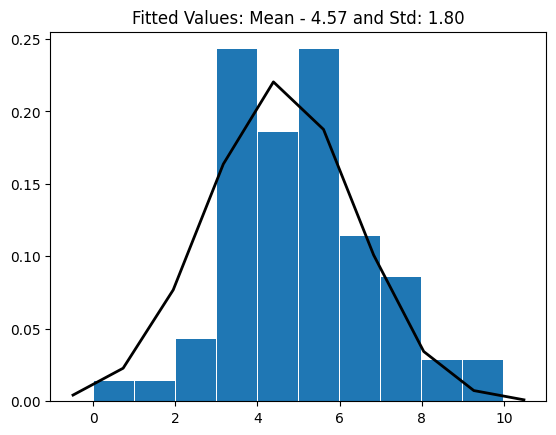

In [104]:
from scipy.stats import norm
from scipy.interpolate import make_interp_spline
import seaborn as sns

mu, std = norm.fit(vpal_df1["Quest Completed"])
plt.hist(vpal_df1["Quest Completed"], bins=10, rwidth=0.98, density=True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fitted Values: Mean - {:.2f} and Std: {:.2f}".format(mu, std)
plt.title(title)

plt.show;


One thing you should note: the Y-axis is not what we would expect. It represents the probability, not an actual count.

To solve this easily, we'll use two seaborn plots. Seaborn is built on top of matplotlib so it is an easy solution rather than manually adding lines of code using matplotlib. We will use histplot and distplot. From the names you should be able to guess what they plot: histogram and distribution.

Conveniently, the retain the more useful Y-axis.

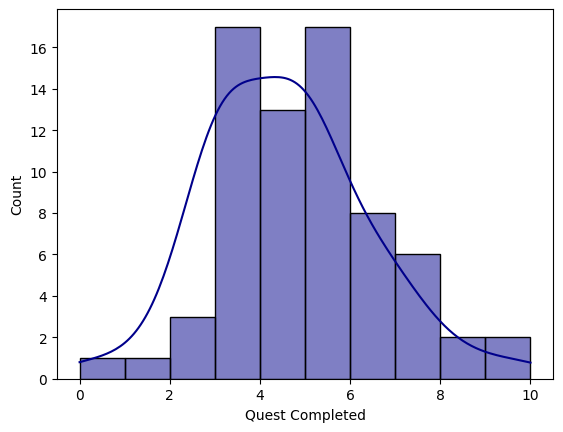

In [101]:
sns.histplot(vpal_df1["Quest Completed"], kde=True, bins=10, color='darkblue');

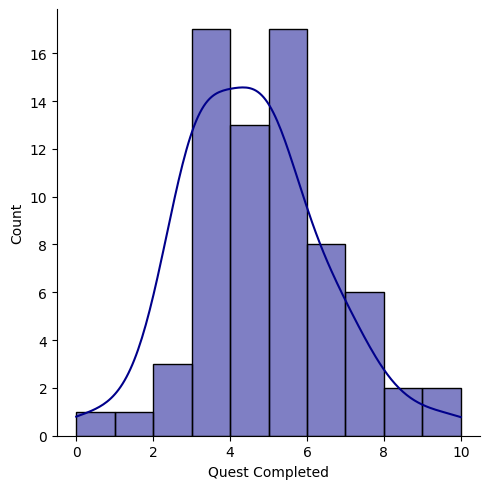

In [102]:
sns.displot(vpal_df1["Quest Completed"], kde=True, bins=10, color='darkblue');

Despite their slight differences in appearance, we can see a bell-shaped, normal distribution.

Now, let's access the measures of centrality directly.

You can easily access these measure for ALL of the columns in the dataframe with a "describe" attribute.

In [103]:
vpal_df1.describe()

,User ID,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,143.157143,9.528571,4.571429,55.914286,30.285714,23.471429,4.228571,39.671429,8.871429,25.000000,21.014286,48.971429,13.900000,21.957143,4.671429,8.442857
std,26.442519,3.458748,1.814366,22.204415,19.745587,17.876161,6.290484,55.361715,8.816851,12.359354,12.827160,65.672656,23.955968,52.682928,9.472648,11.559093
min,101.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.250000,7.000000,3.000000,40.500000,12.250000,6.000000,0.000000,0.000000,2.000000,16.000000,10.000000,7.750000,3.000000,0.000000,0.000000,0.000000
50%,140.500000,9.500000,4.500000,56.000000,32.500000,26.000000,2.500000,14.500000,7.500000,23.500000,21.000000,32.000000,4.000000,1.000000,0.000000,2.000000
75%,160.750000,12.000000,5.750000,72.750000,47.000000,39.000000,5.000000,63.000000,11.000000,34.250000,31.000000,47.750000,12.750000,13.250000,5.750000,16.750000
max,236.000000,16.000000,10.000000,115.000000,64.000000,60.000000,35.000000,302.000000,44.000000,61.000000,53.000000,341.000000,115.000000,255.000000,48.000000,41.000000


As you can see, the Quest Completed column shows a mean of 4.571429 and a standard deviation of 1.814366.

But, what if we didn't want all this info?

In [105]:
vpal_df1["Quest Completed"].mean()

4.571428571428571

In [106]:
vpal_df1["Quest Completed"].std()

1.8143664089258569

In [108]:
vpal_df1["Quest Completed"].median()

4.5

In [110]:
vpal_df1["Quest Completed"].mode()

0    3
1    5
Name: Quest Completed, dtype: int64

The mode returns two outputs - because there are two modes. The first column is the index of the output table. The second column are the two modes, 3 and 5.

We can verify this is correct by counting the values in the column and seeing if 3 and 5 occur most often - which is the definition of 'mode'.

In [111]:
vpal_df1["Quest Completed"].value_counts()

5     17
3     17
4     13
6      8
7      6
2      3
8      2
9      1
10     1
0      1
1      1
Name: Quest Completed, dtype: int64

3 and 5 occur most often at 17 times each!

Also, not that the mean and median are very close. This is also an indication of a normal distribution. But, what about a skewed distribution? Let's look at one next.

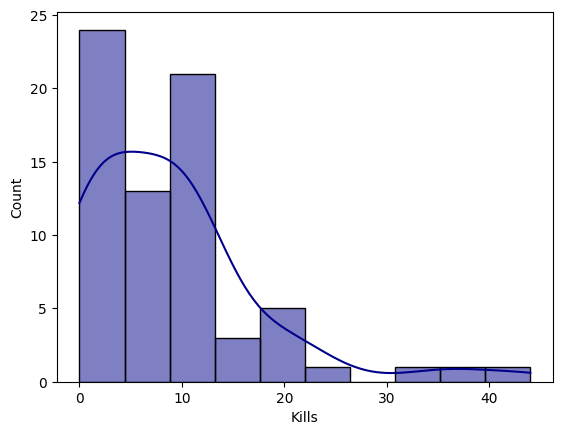

In [112]:
sns.histplot(vpal_df1["Kills"], kde=True, bins=10, color='darkblue');

This is a very different curve! Also, the distance between mean and median is much larger - reflecting the skew.

In [113]:
vpal_df1["Kills"].mean()

8.871428571428572

In [114]:
vpal_df1["Kills"].median()

7.5

There's more than 1 whole number difference!

The vast majority of the curve - apart from the small increase and peak at the beginning - looks very much like an exponential curve. In order to tranform this to a normal distribution, we will use a square root transformation. This is recommended for left skewed distributions.


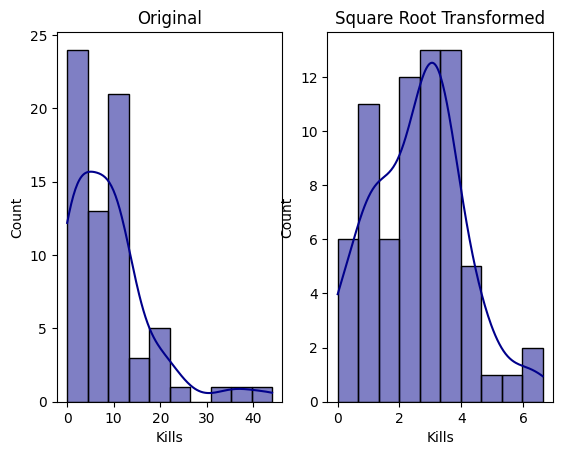

In [126]:
np.random.seed(42)
data_transf = np.sqrt(vpal_df1["Kills"])

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False)
sns.histplot(ax=axs[0], data=vpal_df1["Kills"], kde=True, bins=10, color='darkblue')
sns.histplot(ax=axs[1], data=data_transf, kde=True, bins=10, color='darkblue');

axs[0].set_title("Original")
axs[1].set_title("Square Root Transformed");

Not perfect - but much better!

Now let's look at the range for both columns, along with the variance and standard deviation for each.

In [143]:
rangeQC = (vpal_df1["Quest Completed"].min(axis=0), vpal_df1["Quest Completed"].max(axis=0))
print("The range of the Quest Completed column: ", rangeQC)

varQC = (vpal_df1["Quest Completed"].var(axis=0))
print("The variance of the Quest Completed column: {:.2f}".format(varQC))

sdQC = (vpal_df1["Quest Completed"].std(axis=0))
print("The standard deviation of the Quest Completed column: {:.2f}".format(sdQC))

The range of the Quest Completed column:  (0, 10)
The variance of the Quest Completed column: 3.29
The standard deviation of the Quest Completed column: 1.81


In [141]:
rangeK = (vpal_df1["Kills"].min(axis=0), vpal_df1["Kills"].max(axis=0))
print("The range of the Kills column: ", rangeK)

varK = (vpal_df1["Kills"].var(axis=0))
print("The variance of the Kills column: {:.2f}".format(varK))

sdK = (vpal_df1["Kills"].std(axis=0))
print("The standard deviation of the Kills column: {:.2f}".format(sdK))

The range of the Kills column:  (0, 44)
The variance of the Kills column: 77.74
The standard deviation of the Kills column: 8.82


## Correlation